In [ ]:
import quandl
import numpy as np
import pandas as pd

In [ ]:
API_KEY_JOE="16-3ue4hzwtKNj3DSFYY"
quandl.ApiConfig.api_key=API_KEY_JOE

#### commodity markets
https://blog.quandl.com/api-for-commodity-data

#### understanding the data structure hierachy
database
- CHRIS_metadata.csv
    - contains all 600 futures from all markets
    - ~4000 rows ~8 for each future
    
 
market
- we choose for example cme
- filter by desired market to get all cme 




- build datasets for each category
  - Farms and Fishery Prices
  - Grain
  - Metal Prices
- clean
  - nan cleaning
  - correct time
- merge to one big frame
- basic viz
- rolling methods
 -> create portfolios
 -> todo: market states

In [ ]:
path="./data/"
# load metadata about futures
chris_meta=pd.read_csv(path+"CHRIS_metadata.csv")

# Filter for market
EXCHANGE="CME"
chris_meta=chris_meta[chris_meta["code"].str.contains(EXCHANGE)]
chris_meta.head(10)

### Regex
As we can see every future consists of multiple sub-codes 
We apply regex to only receive only one desired future (the first)

In [ ]:
# apply regex to filter unique futures
regex_="\D*[0-9]*\D+(0|[2-9])*1$"
chris_meta = chris_meta[chris_meta["code"].str.match(regex_)]
futures_to_fetch=chris_meta["code"]
futures_to_fetch_list=futures_to_fetch.tolist()

### Fetch & Save
specify .x for desired column 

CHRIS/ + future + .column
- .0 Date
- .1 Open
- .2 High
- .3 Low
- .4 Last
- .5 Change
- .6 Settle
- .7 Volume
- .8 Previous Day Open Interest

In [31]:
#CHRIS/{EXCHANGE}_{CODE}{NUMBER}
CHRIS="CHRIS/"
COL_=".4"
time_range=["daily","weekly","monthly","quarterly","annual"]

sample_futures = futures_to_fetch_list[0:300]
sample_futures=[CHRIS + f + COL_ for f in sample_futures]
df_commodities = quandl.get(sample_futures, collapse=time_range[0])

df_commodities.to_csv(path+EXCHANGE+"_commodities.csv")

### Loading

In [32]:
df_commodities = pd.read_csv(path+EXCHANGE+"_commodities.csv", index_col=0)
df_commodities.iloc[:,:].head()

,CHRIS/CME_0D1 - Last,CHRIS/CME_0F1 - Last,CHRIS/CME_1N1 - Last,CHRIS/CME_1NB1 - Last,CHRIS/CME_1R1 - Last,CHRIS/CME_1U1 - Last,CHRIS/CME_461 - Last,CHRIS/CME_471 - Last,CHRIS/CME_4L1 - Last,CHRIS/CME_4M1 - Last,...,CHRIS/CME_OFM31 - Last,CHRIS/CME_OPM1 - Last,CHRIS/CME_OPM21 - Last,CHRIS/CME_P51 - Last,CHRIS/CME_P71 - Last,CHRIS/CME_P81 - Last,CHRIS/CME_P821 - Last,CHRIS/CME_PA1 - Last,CHRIS/CME_PC1 - Last,CHRIS/CME_PD1 - Last
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.series.Series'>



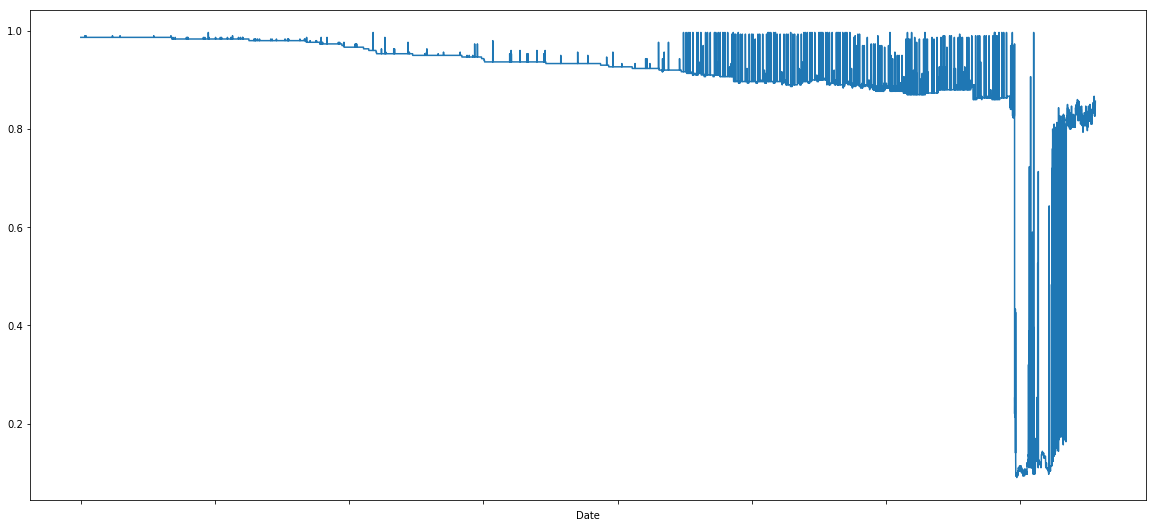

In [63]:
def missingValues(data):
    # nan percentage
    count_nulls = data.isnull().sum(axis=1)/len(data.columns)
    print(type(count_nulls))
    series=count_nulls[10:]
    series.plot(subplots=True, figsize=((20,10)))
    return count_nulls

missingValues(df_commodities)
print("")

In [ ]:
## OLD
'''
A_COMMODITIES_Vegetable_Oil_Prices=["ODA/PROIL_USD","ODA/PSUNO_USD","ODA/POLVOIL_USD","ODA/PPOIL_USD"]

B_COMMODITIES_Forestry_Prices=["ODA/PLOGSK_USD","ODA/PLOGORE_USD","ODA/PSAWORE_USD","ODA/PSAWMAL_USD","CHRIS/CME_LB1","ODA/PRUBB_USD"]

C_COMMODITIES_Textiles_and_Fibres_Prices=["ODA/PCOTTIND_USD","CHRIS/ICE_CT1"]

D_COMMODITIES_METAL=["LBMA/GOLD", "WIKI/AAPL", "BUNDESBANK/BBK01_WT5511"]

E_COMMODITIES_GRAIN=["CHRIS/CME_C1", "CHRIS/CME_O1", "CHRIS/CME_RR1", "CHRIS/CME_S1",
                   "CHRIS/CME_SM1", "CHRIS/CME_BO1", "CHRIS/CME_W1"]

A_COMMODITIES_Vegetable_Oil_Prices=A_COMMODITIES_Vegetable_Oil_Prices
B_COMMODITIES_Forestry_Prices=B_COMMODITIES_Forestry_Prices
C_COMMODITIES_Textiles_and_Fibres_Prices=C_COMMODITIES_Textiles_and_Fibres_Prices
E_COMMODITIES_GRAIN=[s + col_ for s in E_COMMODITIES_GRAIN]
'''